# INTRODUCTION TO PyTorch

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, datasets
x = torch.tensor([2,5])
y = torch.Tensor([3,4])
print(x,y)

tensor([2, 5]) tensor([3., 4.])


In [2]:
y.shape

torch.Size([2])

In [3]:
a = torch.zeros([3,4])
print("a:",a)
b = torch.rand([3,2])
print("b:",b)
c = b.view([1,6])
print("c:",c)
d = b.view([2,3])
print("d:",d)
e = b.view([-1,3])
print("e:",e)
f = b.view([-1,2])
print("f:",f)

a: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
b: tensor([[0.1634, 0.4965],
        [0.3794, 0.6156],
        [0.7231, 0.1388]])
c: tensor([[0.1634, 0.4965, 0.3794, 0.6156, 0.7231, 0.1388]])
d: tensor([[0.1634, 0.4965, 0.3794],
        [0.6156, 0.7231, 0.1388]])
e: tensor([[0.1634, 0.4965, 0.3794],
        [0.6156, 0.7231, 0.1388]])
f: tensor([[0.1634, 0.4965],
        [0.3794, 0.6156],
        [0.7231, 0.1388]])


In [4]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [6]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
data[1][8].shape

torch.Size([])

In [8]:
x,y = data[0][6], data[1][6]
print(y)

tensor(2)


In [9]:
print(data[0][6].shape)
print(data[0][6].view(28,28).shape)

torch.Size([1, 28, 28])
torch.Size([28, 28])


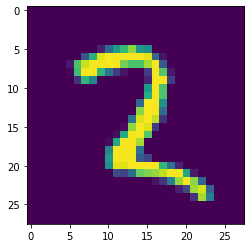

In [10]:
plt.imshow(data[0][6].view(28,28))
plt.show()

In [11]:
count_int = torch.zeros([10])
total = 0
for data in trainset:
    x,y =data
    for i in range(10):
        count_int[int(y[i])]+=1
        total+=1
print(count_int, total)

tensor([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851., 5949.]) 60000


In [12]:
for i in range(10):
    print(i,":",np.round(count_int[i]/total*100,2),"% ")

0 : tensor(9.8700) % 
1 : tensor(11.2400) % 
2 : tensor(9.9300) % 
3 : tensor(10.2200) % 
4 : tensor(9.7400) % 
5 : tensor(9.0400) % 
6 : tensor(9.8600) % 
7 : tensor(10.4400) % 
8 : tensor(9.7500) % 
9 : tensor(9.9200) % 


In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
X = torch.rand(28,28)
X = X.view(-1,28*28)
output = net(X)
output

tensor([[-2.3876, -2.3622, -2.4388, -2.3304, -2.3296, -2.1971, -2.2135, -2.3096,
         -2.1993, -2.2881]], grad_fn=<LogSoftmaxBackward>)

In [16]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCH = 1

In [17]:
for epoch in range(EPOCH):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    

tensor(0.1674, grad_fn=<NllLossBackward>)


In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
print("Acuracy: ", round(correct/total,3))

Acuracy:  0.954


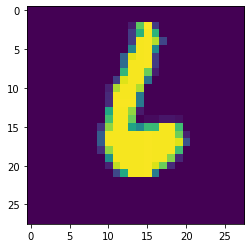

tensor(6, grad_fn=<NotImplemented>)


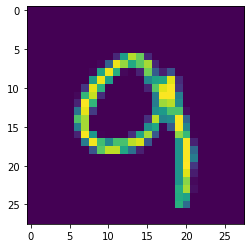

tensor(9, grad_fn=<NotImplemented>)


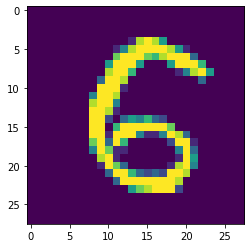

tensor(5, grad_fn=<NotImplemented>)


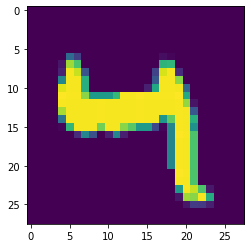

tensor(4, grad_fn=<NotImplemented>)


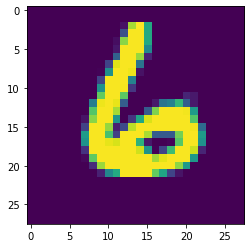

tensor(6, grad_fn=<NotImplemented>)


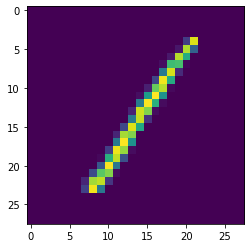

tensor(1, grad_fn=<NotImplemented>)


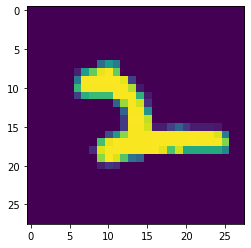

tensor(2, grad_fn=<NotImplemented>)


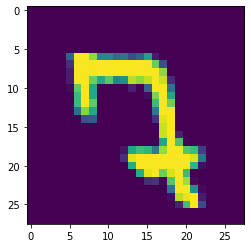

tensor(7, grad_fn=<NotImplemented>)


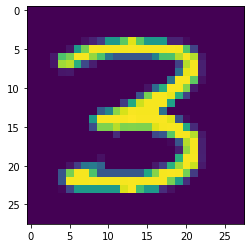

tensor(3, grad_fn=<NotImplemented>)


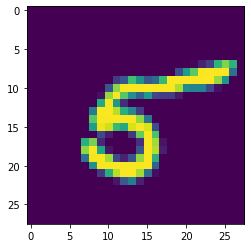

tensor(5, grad_fn=<NotImplemented>)


In [19]:
for i in range(10):
    plt.imshow(X[i].view(28,28))
    plt.show()
    print(torch.argmax(net(X[i].view(-1,28*28))[0]))